<a href="https://colab.research.google.com/github/rdbhatkal/Sales_Prediction/blob/main/Sales_prediction_pt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sales Prediction Cleaning the Data Set

In [1]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import all libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
# reading the csv file from the drive 
filename = '/content/drive/MyDrive/CodingDojo/02 Week 2: Pandas/sales_predictions.csv'
df = pd.read_csv(filename)

In [4]:
# Looking at first 5 rows of the dataframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Using Pandas to start cleaning and exploring the data

In [5]:
#The shape of the data set 
df.shape

(8523, 12)

In [6]:
# Checking for duplicate values
df.duplicated().sum()

0

No duplicate values so we keep exploring

In [7]:
#Understanding the datatypes of each column
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Let us change the Outlet_Establishment_Year from and int data type to a date

Source: https://stackoverflow.com/questions/46658232/pandas-convert-column-with-year-integer-to-datetime


In [8]:
# change the data type of Outlet_Establishmnet_Year to string
df['Outlet_Establishment_Year'] = pd.to_datetime(df.Outlet_Establishment_Year, format='%Y')

In [9]:
#Recheck the datatypes of each column
df.dtypes

Item_Identifier                      object
Item_Weight                         float64
Item_Fat_Content                     object
Item_Visibility                     float64
Item_Type                            object
Item_MRP                            float64
Outlet_Identifier                    object
Outlet_Establishment_Year    datetime64[ns]
Outlet_Size                          object
Outlet_Location_Type                 object
Outlet_Type                          object
Item_Outlet_Sales                   float64
dtype: object

In [10]:
# Checking the number of unique values 
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [11]:
#Checking for null values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

As we can see Item_Weight and Outlet_Size has significant missing values so they cannot be dropped.

## Analyzing the Null Values 

1) Lets look at Outlet_Size first

In [12]:
# Looking at Outlet Size 
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Since Outlet_Size is a categorical column, we can fill the missing cells with ‘Unknown’

In [13]:
df['Outlet_Size'].fillna(value='Unknown',inplace=True)


In [14]:
# Lets check to see if the null values have been replaced
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

As we can see above, Outlet_Size no longer has null values

2) Now lets look at null values in the Item_Weight column 

In [15]:
# Looking at Item Weight
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [16]:
# Looking at Item_Type
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Let us assume that products that belong to a certain "Item_Type" group are similar in weight 

We will replace the null values in the Item_Weight column with the mean weight of product who belong to the same Item_Type category 

Code Source: https://stackoverflow.com/questions/53338898/pandas-dataframe-replace-nan-values-with-average-of-a-certain-group


In [17]:
df['Item_Weight'] = df.Item_Weight.fillna(df.groupby('Item_Type')['Item_Weight'].transform('mean'))                                                                                                                                                          


In [18]:
# Lets check to see if the null values have been replaced
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Since there are no more null values in our data set, we will continue with our exploration of the data

## Let us now take a closer look at all the Categorical data columns

1) Item_Fat_Content column

In [19]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

As we can see above, we have some inconsistency in category names and should be fixed

In [20]:
# Replacing 'LF' with 'Low Fat'
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
# Replacing 'low fat' with 'Low Fat'
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
# Replacing 'regular' with 'Regular'
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

In [21]:
# Lets look at the value count once again
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

We now have only two unique values for Item_Fat_Content, so we can continue with our exploration

2) Item_Type column

In [22]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

As we can see above, we only have unique categories so we can continue with our exploration

3) Outlet _Size column

In [23]:
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

As we can see above, we only have unique values in this category so we can continue with our exploration

4) Outlet_Location_Type column

In [24]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

As we can see above, we only have unique values in this category so we can continue with our exploration

5) Outlet_Type column

In [25]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

As we can see above, we only have unique values in this category so we can continue with our exploration

# Now let us take a deeper dive into our numerical columns and obtain a summary statistic of each column 

In [26]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857890,0.066132,140.992782,2181.288914
std,4.232804,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,9.310000,0.026989,93.826500,834.247400
50%,12.867061,0.053931,143.012800,1794.331000
75%,16.000000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


# Using Pandas to do statistical analysis and help understand and explain our dataset 

## Let us start by looking at our Numerical Variables

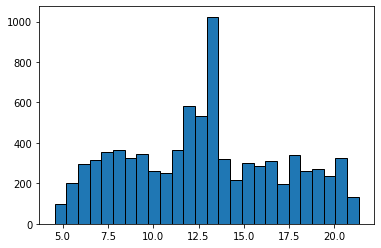

In [27]:
#Let us plot the Item_Weight column to understand the weight distribustion of the items
plt.hist(df['Item_Weight'],edgecolor="black", bins = 'auto');


From the above histogram, we can see that most of the items have weight in range of 10-16. 


Source:
https://towardsdatascience.com/a-complete-guide-to-plotting-categorical-variables-with-seaborn-bfe54db66bec 


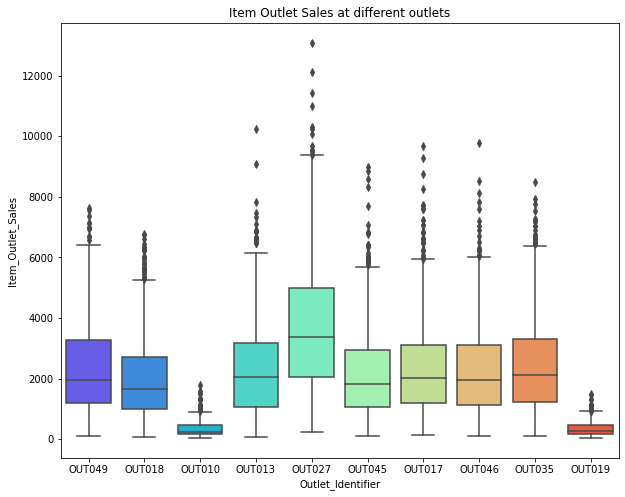

In [28]:
#Use boxplot to understand the Items Outlet Sales at each outlet 
plt.figure(figsize=(10,8))
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=df, palette='rainbow')
plt.title("Item Outlet Sales at different outlets");

This box plot shows us how each Outlet is performing with respect to its sales. We can see that outlet OUT027 is performing great in terms of Item_Outlet_Sales while OUT010 and OUT019 are performing poorly

### Let us look to see what kind of relationships we have amoung our numerical variables 

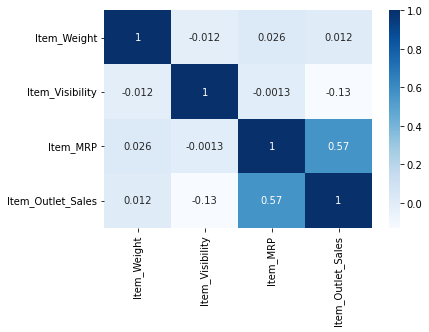

In [28]:
#Understanding correlations amoung our numeric variables
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues',annot = True);

From the above graph we can see that there is a moderate positive correlation between 
Item_MRP and Item_Outlet_Sales 

Since we will be predicting the Item_Outlet_Sales; it is good to know there is a positive correlation between Item_MRP and Item_Outlet_Sales 

## Let us now look at our some of our Categorical Variables

Source:
https://datavizpyr.com/sort-bars-in-barplot-using-seaborn-in-python/

https://stackabuse.com/seaborn-bar-plot-tutorial-and-examples/

https://drawingfromdata.com/seaborn/matplotlib/visualization/rotate-axis-labels-matplotlib-seaborn.html

Let us look at overall sales at outlets by Location Type

In [29]:
#Using group by to see overall sales by Outlet Location Type
SalesBy_TierType = df.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].sum()
SalesBy_TierType

Outlet_Location_Type
Tier 1    4.482059e+06
Tier 2    6.472314e+06
Tier 3    7.636753e+06
Name: Item_Outlet_Sales, dtype: float64

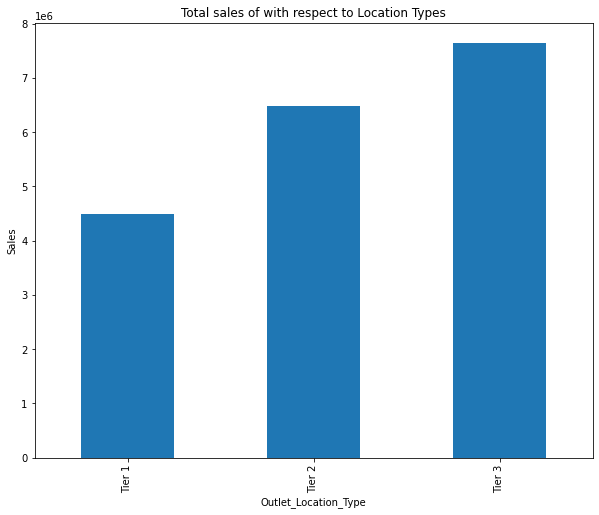

In [30]:
#Lets plot the above result
SalesBy_TierType.plot(kind="bar",figsize=(10,8))
plt.ylabel("Sales")
plt.title("Total sales of with respect to Location Types")
plt.show()

We see that Tier 3 stores has the highest Sales while Tier 1 has the lowest average sale, we will now try to understand what kind of outlets do these locations have

In [31]:
# Lets see what type of outlets exist in each tier and their sales contribution
SalesBy_OutletType = df.groupby(['Outlet_Location_Type','Outlet_Type'])['Item_Outlet_Sales'].sum()
SalesBy_OutletType

Outlet_Location_Type  Outlet_Type      
Tier 1                Grocery Store        1.796941e+05
                      Supermarket Type1    4.302365e+06
Tier 2                Supermarket Type1    6.472314e+06
Tier 3                Grocery Store        1.883402e+05
                      Supermarket Type1    2.142664e+06
                      Supermarket Type2    1.851823e+06
                      Supermarket Type3    3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

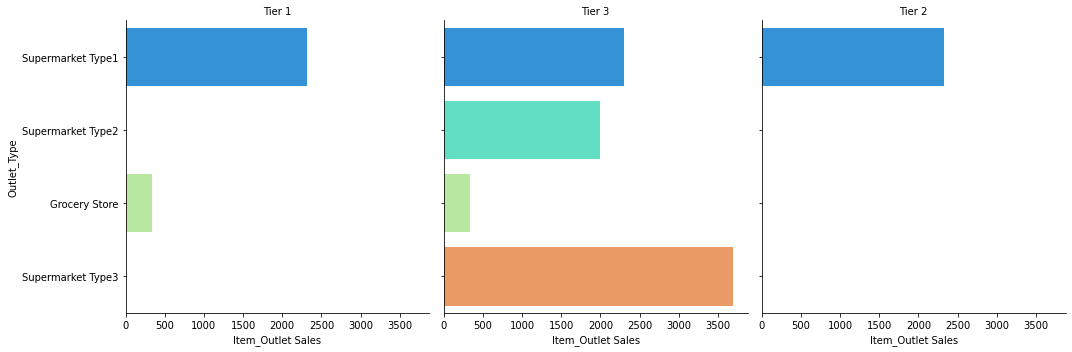

In [32]:
##Lets plot the above result
g = sns.catplot( x='Item_Outlet_Sales',y ='Outlet_Type', col = 'Outlet_Location_Type', ci = None, data=df, kind='bar',  palette='rainbow')
g.set_axis_labels("Item_Outlet Sales", "Outlet_Type")
g.set_titles("{col_name}");


We see that Supermarket type 3 is doing the best which contributes to the overall sales in Tier 3. 
Supermarket Type 2 & 3 only exists in Tier 3 

Supermarket Type 1 is the only type that exists in all 3 Tiers and contribute similar sales value to their Tiers 
Grocery Store exists in Tier 1 and Tier 3


Source:
https://datavizpyr.com/sort-bars-in-barplot-using-seaborn-in-python/

https://stackabuse.com/seaborn-bar-plot-tutorial-and-examples/

https://drawingfromdata.com/seaborn/matplotlib/visualization/rotate-axis-labels-matplotlib-seaborn.html

<Figure size 1152x576 with 0 Axes>

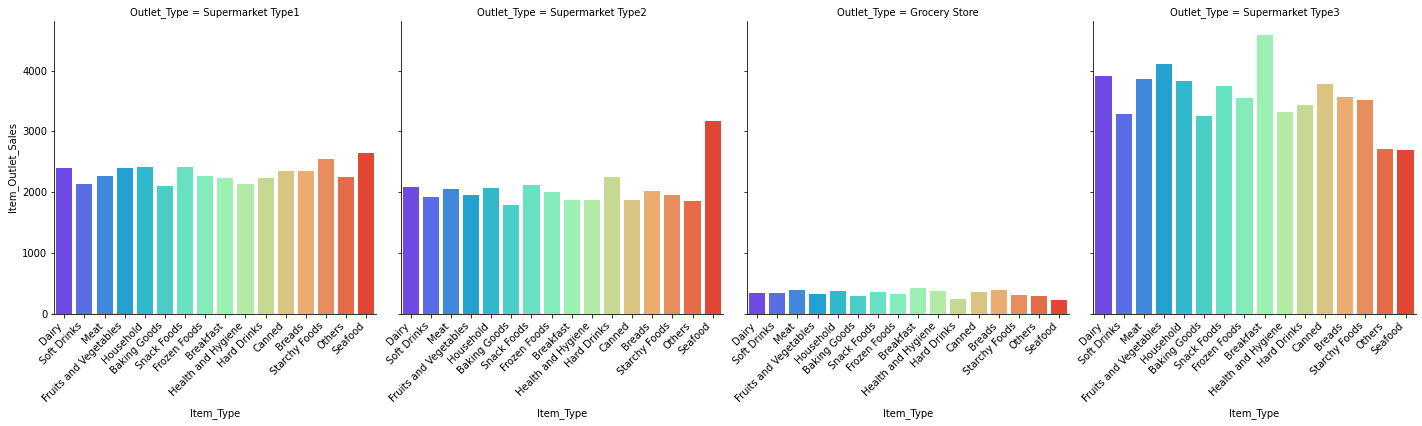

In [35]:
#Let us look at the Sales for each outlet type broken down by Item Type
plt.figure(figsize=(16,8))

chart = sns.catplot( x='Item_Type', y = 'Item_Outlet_Sales', col = 'Outlet_Type' , kind = 'bar',ci = None, data=df,  palette='rainbow');

chart.set_xticklabels(rotation=45, horizontalalignment='right');


The above vizualization shows us the Sales of items by its Item_Type

In Supermarket Type 1 Seafood and Starchy Food have highest sales 
In Supermarket Type 2 Seafood and Hard Drinks have highest sales 
Grocery Stores Breakfast and Meat item types have the hieghest sales
In Supermarket Type 3 Breakfast and Fruits and Vegetables have highest sales